### Predicting Diabetes with Multilayer Perceptrons

Diabetes is a chronic medical condition that is associated with elevated blood sugar levels in the body. Diabetes often leads to cardiovascular disease, stroke, kidney damage, and long-term damage to the extremities (that is, limbs and eyes).
One of the barriers for early detection and diagnosis of diabetes is that the early stages of diabetes are often non-symptomatic. People who are on the path to diabetes (also known as prediabetes) often do not know that they have diabetes until it is too late. How can we use machine learning to address this problem? 

The goal of this project therefore, is to use AI (machine learning and neural networks) to predict whether a patient is at risk of diabetes.

### The Diabetes Mellitus Dataset
The dataset that we will be using for this project comes from the Pima Indians Diabetes dataset, as provided by the National Institute of Diabetes and Digestive and Kidney Diseases (and hosted by Kaggle).
The Pima Indians are a group of native Americans living in Arizona, and they are a highly studied group of people due to their genetic predisposition to diabetes. It is believed that the Pima Indians carry a gene that allows them to survive long periods of starvation. This thrifty gene allowed the Pima Indians to store in their bodies whatever glucose and carbohydrates they may eat, which is genetically advantageous in an environment where famines were common.
However, as society modernized and the Pima Indians began to change their diet to one of processed food, the rate of type 2 diabetes among them began to increase as well. Today, the incidence of type 2 diabetes among the Pima Indians is the highest in the world. This makes them a highly studied group of people, as researchers attempt to find the genetic link of diabetes among the Pima Indians.
The Pima Indians diabetes dataset consists of diagnostic measurements collected from a sample of female Pima Indians, along with a label indicating whether the patient developed diabetes within five years of the initial measurement. 

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis

In [2]:
#import the dataset into pandas:

import pandas as pd

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


From above, there are 768 rows and  9 columns in the dataset. These are the column variable definitions:

* Pregnancies: Number of previous pregnancies 
* Glucose: Plasma glucose concentration
* BloodPressure: Diastolic blood pressure
* SkinThickness: Skin fold thickness measured from the triceps
* Insulin : Blood serum insulin concentration
* BMI: Body mass index
* DiabetesPedigreeFunction: A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
* Age: Age in years
* Outcome: The target variable we are trying to predict, 1 for patients that developed diabetes within five years of the initial measurement, and 0 otherwise

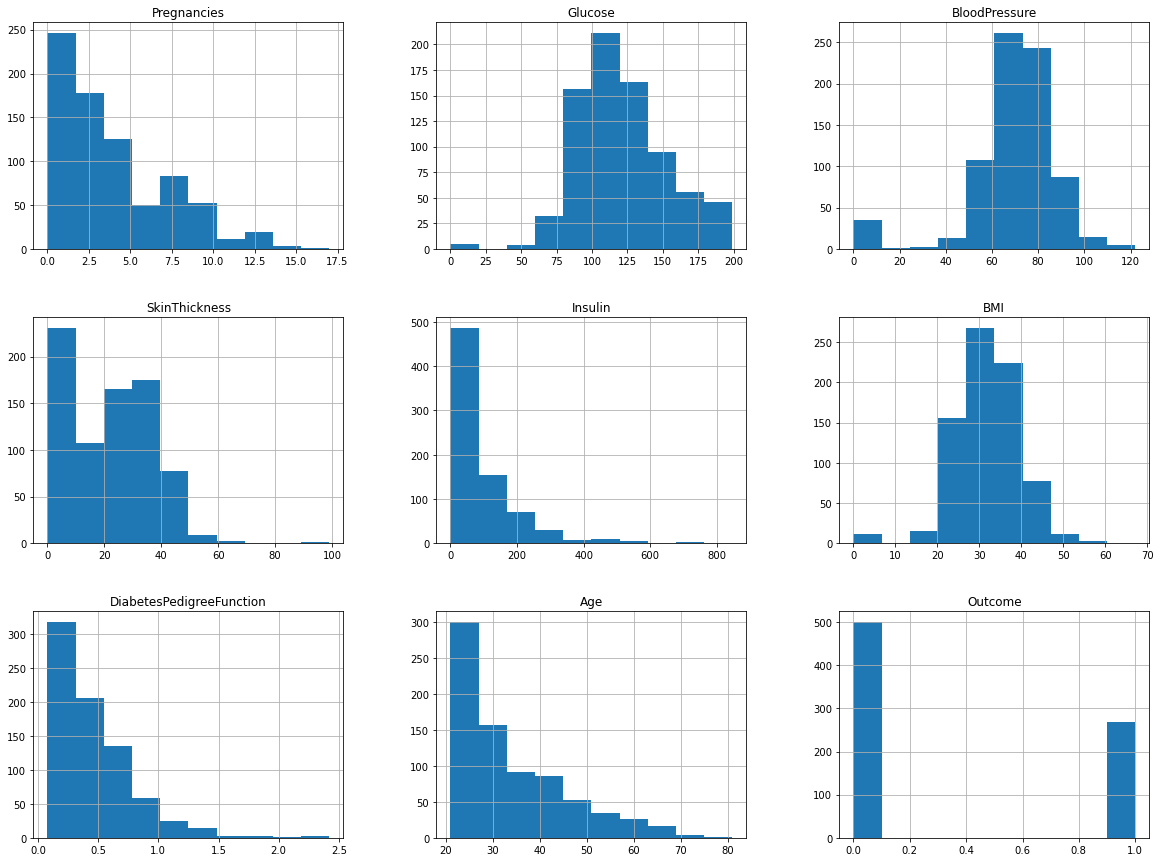

In [3]:
#visualizing the distribution of the nine variables in the dataset. 
from matplotlib import pyplot as plt 

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax = ax)
plt.savefig('Images/Histogram',dpi=150)

The histogram provides some interesting insights into the data. 
* From the histogram for Age, we can see that most of the data was collected from young people, with the most common age group between 20-30 years old. 
* We can also see that the distribution for BMI, BloodPressure, and Glucose concentration is normally distributed (that is, a bell curve shape), which is what we we expect when we collect such statistics from a population. 
* It appears that there are people with plasma Glucose concentration that is almost 200, & others with 0 values for BMI, BloodPressure, and Glucose which are extreme and logically impossible for these measurements.
* We can see that some patients had more than 15 previous pregnancies, while that may not be entirely surprising, we should keep such outliers in mind when we do our analysis, as it can skew our results.
* The distribution of outcome shows that approximately 65% of the population belongs to class 0 (no diabetes), while the remaining 35% belongs to class 1 (diabetes).
* Lastly, it is important to note that the variables are on different scales which can cause problems in training our neural network, as variables with larger scales tend to dominate variables with smaller scales and will therefore need to standardize the variables.

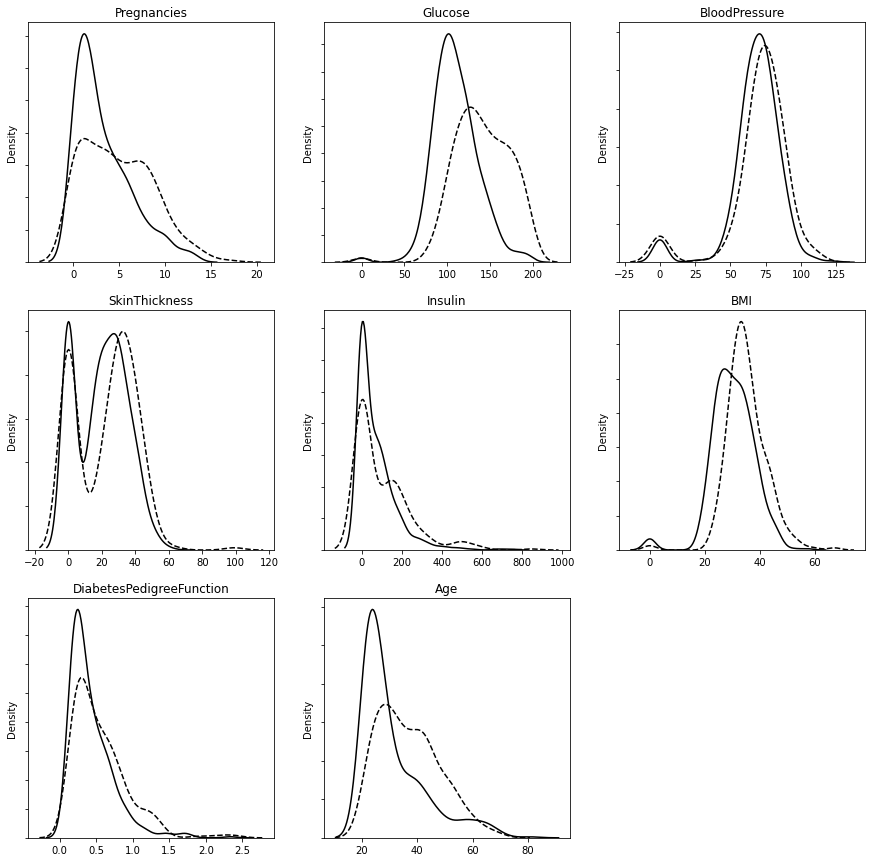

In [4]:
#visualize the difference in distribution between diabetics and non-diabetics

import seaborn as sns

##### create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

##### Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

###### Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)
plt.savefig('Images/Density_plot',dpi=150)
plt.show()

If we look at the plot for the Glucose variable, we can see that among the non-diabetics (solid line), the curve has a normal distribution centered around the value 100. This tells us that among non-diabetics, most people have a blood glucose value of 100 mg/dL. On the other hand, if we look at the Diabetics (dashed line), the curve is wider and is centered around a value of 150. This tells us that diabetics tends to have a wider range of blood glucose value, and the average blood glucose value is around 150 mg/dL. Therefore, there is a significant difference in blood glucose values for diabetes vs non-diabetics.  A similar analysis can also be made for the variable BMI and Age. In other words, the Glucose, BMI, and Age variables are strong predictors for diabetes. People with diabetes tend to have higher blood glucose level, higher BMI, and are older.

On the other hand, we can see that for variables such as BloodPressure and SkinThickness, there is no significant difference in the distribution between diabetics and non-diabetics. The two groups of people tend to have similar blood pressure and skin thickness values. Therefore, BloodPressure and SkinThickness are poorer predictors for diabetes.

### Data preprocessing

#### Handling missing values
There are several techniques to handle missing values:

* Remove (discard) any rows with missing values.
* Replace the missing values with the mean/median/mode of the non-missing values.
* Predict the actual values using a separate machine learning model.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

The above tells us that there aren't any missing values which we already know from the EDA isn't true, so lets look at statistical summary of the dataset to investigate further:

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As anticipated, we see minimum measurements for Glucose, BloodPressure, SkinThickness, Insulin, and BMI of 0 which should never and is an indication that there are missing values in our dataset which we need to handle. We also see extreme maximum values which might be considered outliers and will also need to be handled.

In [8]:
####Let's take a look at how many 0 values there are in each column to understand the extent of the problem:

print("Number of rows with 0 values for each variable")
for col in df.columns[1:7]:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0


In the Insulin column, there are 374 rows with 0 values, i.e. almost half of the data that we have. Clearly, we cannot discard these rows with 0 values as that will cause a significant drop in model performance.Note that pregnancy and outcome were left out since 0 values in these columns are perfectly valid.
Since the missing values comes from continuous variables such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI, we will replace the missing values with the mean of the non-missing values. We do this by first using mask method to make all 0 to np.nan, then fillna with the mean values.

In [9]:
for col in df.columns[1:7]:
    df[col]=df[col].mask(df[col]==0).fillna(df[col].mean())
    
#Alternative
#df['Glucose'] = df['Glucose'].replace(0, np.nan)
#df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())

In [10]:
# lets recheck if missing values handled
print("Number of rows with 0 values for each variable")
for col in df.columns[1:7]:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0


#### Data Standardization
The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit variance.

As we have seen earlier,some of the variables have vastly different scales; for instance, the maximum value for Insulin is 846 while that of DiabetesPedigreeeFunction is only 2.42. With such different scales, the variable with the greater scale tends to dominate when training the neural network, causing the neural network to inadvertently place more emphasis on the variable with a greater scale.

In [11]:
#To standardize our data, we can use the preprocessing class from scikit-learn
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) #to convert back to pandas DataFrame
df_scaled['Outcome'] = df['Outcome'] #maintain original Outcome column which isn't to be scaled
df = df_scaled #rename scaled DataFrame as df

In [12]:
# let's check if each variable now has zero mean, unit variance(std) & is scaled.

#df.describe().loc[['mean', 'std','max'],].round(2).abs()
df.describe().round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,1.14,2.55,3.99,2.04,1.13,2.07,1.19,1.04,0.00
25%,0.84,0.72,0.68,0.63,0.42,0.72,0.69,0.79,0.00
50%,0.25,0.15,0.02,0.37,0.42,0.07,0.30,0.36,0.00
75%,0.64,0.61,0.64,0.56,0.09,0.60,0.47,0.66,1.00
max,3.91,2.54,4.11,7.52,7.82,5.04,5.88,4.06,1.00


#### Training, Testing, and Validation Sets
The last step in data preprocessing is to split the data into training, testing, and validation sets:
* Training set: The neural network will be trained on this subset of the data.
* Validation set: This set of data allows us to perform hyperparameter tuning (that is, tuning the number of hidden layers) using an unbiased source of data.
* Testing set: The final evaluation of the neural network will be based on this subset of the data.

In [13]:
from sklearn.model_selection import train_test_split

#### Create X (input features) and y (target variable)
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

#### split the data into the training set (80%) and the testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### create the final training set and the validation set:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### Designing the Neural Network Architecture (MLPs)

In [14]:
#### Let's create a new Sequential() class:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#### Add first hidden layer with 32 nodes & 8 input dimensions(because there are 8 columns in X_train)
model.add(Dense(32, activation='relu', input_dim=8))

#### Add the second hidden layer
model.add(Dense(16, activation='relu'))

#### Add the output layer (using sigmoid function, which squashes the output between 0 and 1 (binary output))
model.add(Dense(1, activation='sigmoid'))

#### Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train the model for 200 epochs / iterations
model.fit(X_train, y_train, epochs=200)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
614/614 [==============================] - 0s 250us/sample - loss: 0.6497 - acc: 0.6564
Epoch 2/200
614/614 [==============================] - 0s 59us/sample - loss: 0.6020 - acc: 0.7410
Epoch 3/200
614/614 [==============================] - 0s 55us/sample - loss: 0.5593 - acc: 0.7655
Epoch 4/200
614/614 [==============================] - 0s 57us/sample - loss: 0.5217 - acc: 0.7687
Epoch 5/200
614/614 [==============================] - 0s 54us/sample - loss: 0.4945 - acc: 0.7801
Epoch 6/200
614/614 [==============================] - 0s 51us/sample - loss: 0.4778 - acc: 0.7801
Epoch 7/200
614/614 [==============================] - 0s 55us/sample - loss: 0.4660 - acc: 0.7932
Epoch 8/200
614/614 [==============================] - 0s 55us/sample - loss: 0.4572 - acc: 0.

614/614 [==============================] - 0s 52us/sample - loss: 0.3319 - acc: 0.8502
Epoch 77/200
614/614 [==============================] - 0s 54us/sample - loss: 0.3303 - acc: 0.8534
Epoch 78/200
614/614 [==============================] - 0s 51us/sample - loss: 0.3308 - acc: 0.8550
Epoch 79/200
614/614 [==============================] - 0s 54us/sample - loss: 0.3292 - acc: 0.8567
Epoch 80/200
614/614 [==============================] - 0s 50us/sample - loss: 0.3285 - acc: 0.8632
Epoch 81/200
614/614 [==============================] - 0s 52us/sample - loss: 0.3272 - acc: 0.8518
Epoch 82/200
614/614 [==============================] - 0s 50us/sample - loss: 0.3261 - acc: 0.8599
Epoch 83/200
614/614 [==============================] - 0s 54us/sample - loss: 0.3245 - acc: 0.8616
Epoch 84/200
614/614 [==============================] - 0s 50us/sample - loss: 0.3221 - acc: 0.8632
Epoch 85/200
614/614 [==============================] - 0s 52us/sample - loss: 0.3207 - acc: 0.8616
Epoch 86/200


As we can see, the loss decreases and the accuracy (based on the training data) increases over each epoch, as the learning algorithm continuously updates the weights and biases in the MLP according to the training data.

### Results Analysis
Let's evaluate our model based on the testing accuracy, confusion matrix, and receiver operating characteristic (ROC) curve.

In [15]:
#### Evaluate the model on the training and testing set using the evaluate() function:

scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

614/614 [==============================] - 0s 77us/sample - loss: 0.2108 - acc: 0.9153
Training Accuracy: 91.53%

154/154 [==============================] - 0s 71us/sample - loss: 0.8445 - acc: 0.7208
Testing Accuracy: 72.08%



The accuracy is 91.53% and 72.08% on the training set and testing set respectively. The difference in accuracy between the training and testing set isn't surprising since the model was trained on the training set. In fact, by training the model over more iterations, we can achieve 100% accuracy on the training set, but that would not be desirable as it just means that we are overfitting our model. The testing accuracy should always be used to evaluate the real-world performance of our model, as the testing set represents real-world data that the model has never seen before.

The testing accuracy of 72.08% is pretty impressive for our simple MLP with just two hidden layers. What this means is that given the eight measurements from a new patient (glucose, blood pressure, insulin, and so on), our MLP is able to predict with ~72% accuracy whether that patient will develop diabetes within the next five years. In essence, we have developed our first AI agent!

#### Confusion matrix

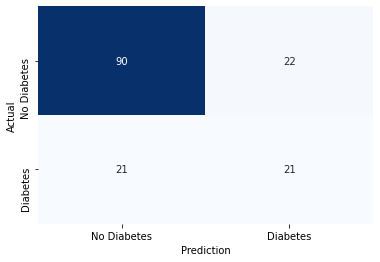

In [16]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.savefig('Images/c_matrix',dpi=150)

From the preceding confusion matrix, we can see that most predictions are true negatives(80) and true positives(34), nevertheless, the 19 false negatives and 21 other false positives predictions are highly undesirable, eventhough a false negative is perhaps more damaging than a false positive. since a false negative means telling the patient that they will not develop diabetes within the next five years, when in fact they would. 

#### ROC curve

The ROC curve is a plot with the True Positive Rate (TPR) on the y axis and the False Positive Rate (FPR) on the x axis. When we analyze the ROC curve, we look at the area under the curve (AUC) to evaluate the performance of the model that produced the curve. A large AUC indicates that the model is able to differentiate the respective classes with high accuracy, while a low AUC indicates that the model makes poor, often wrong predictions. A ROC curve that lies on the diagonal indicates that the model does no better than random. 

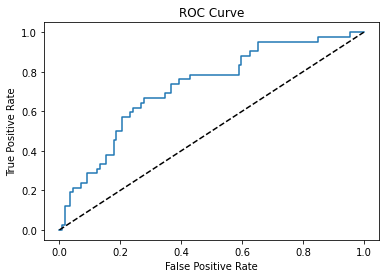

In [17]:
from sklearn.metrics import roc_curve

#get predicted probabilities of each class
y_test_pred_probs = model.predict(X_test) 

#roc_curve function to get the corresponding false positive rate and true positive rate for the ROC curve:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Images/ROC Curve',dpi=150)

From the preceding ROC Curve, we can see that the model performs rather well. This shows that our model is able to differentiate samples of different classes, making good predictions.

### Make individual predictions

* Ideal Blood Glucose level: 90 - 110 md/dL
* Ideal Blood Pressure level: 120/80 mmHg
* Ideal BMI: 18.5 - 24.9

In [18]:
#### Method 1
def make_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    data = preprocessing.scale(data)
    prob = model.predict_proba(data)
    if prob >= 0.2:
        return 'This Patient is at risk'
    else:
        return 'This Patient is not at risk'

In [19]:
from collections import OrderedDict
patient_input = OrderedDict([('Pregnancies', 4),('Glucose', 140 ),('BloodPressure', 80),
                            ('SkinThickness', 38 ),('Insulin', 180 ),('BMI', 38 ),
                            ('DiabetesPedigreeFunction', 0.3 ),('Age', 50 )])

patient_status = pd.Series(patient_input)
make_prediction(patient_status)

'This Patient is at risk'

In [20]:
patient_input = OrderedDict([('Pregnancies', 2),('Glucose', 100 ),('BloodPressure', 120),
                            ('SkinThickness', 30 ),('Insulin', 100 ),('BMI', 21 ),
                            ('DiabetesPedigreeFunction', 0 ),('Age', 40)])

patient_status = pd.Series(patient_input)
make_prediction(patient_status)

'This Patient is at risk'

In [21]:
#### Method_2
def patient_stat(input_data):
    data = preprocessing.scale(input_data)
    y_pred = model.predict(data)
    if y_pred == 0:
        print('This Patient is not at risk')
    else:
        print('This Patient is at risk')

In [22]:
patient_stat([[4,140,80,38,180,38,0.3,50]])

This Patient is at risk


In [23]:
patient_stat([[2,100,120,0,100,21,0,40]])

This Patient is at risk


From the above, I tried different patients input but did not get one for which patient was not at risk, the only case was if I increased the probability. This however isn't surprising because the model definitely needs improvement.

#### Further improvements

From above, it is worth wondering if it is possible to further improve the performance of our model. How can we further improve the accuracy of our model and/or improve the false negative and false positive rate?

* Feature engineering (i.e. increasing the number of features) might be an option since the Pima Indians Diabetes dataset only consists of eight features, and it can be argued that these features alone are insufficient to really predict the onset of diabetes. This should however be done carefully, since adding inappropriate features may create noise for our machine learning model, affecting the performance of our model. 

* On the opposite spectrum, Feature Selection (i.e. removing features) can be employed when we believe that the original dataset contains too much noise in order to improve model performance. One popular way to do feature selection is to use decision trees. Again, feature selection is also a double-edged sword that can potentially affect model performance.

* Hyperparameter Tuning